In [1]:
%matplotlib widget
%matplotlib 
# check your backend is ipympl, which needs to be installed by yourself manually pip install ipympl
import matplotlib.pyplot as plt
from pyna.interact.matplotlib.pickpoints import Line2DExtender, uniformly_scattered_points_in_polygon
import numpy as np
plt.ion()

Using matplotlib backend: module://ipympl.backend_nbagg


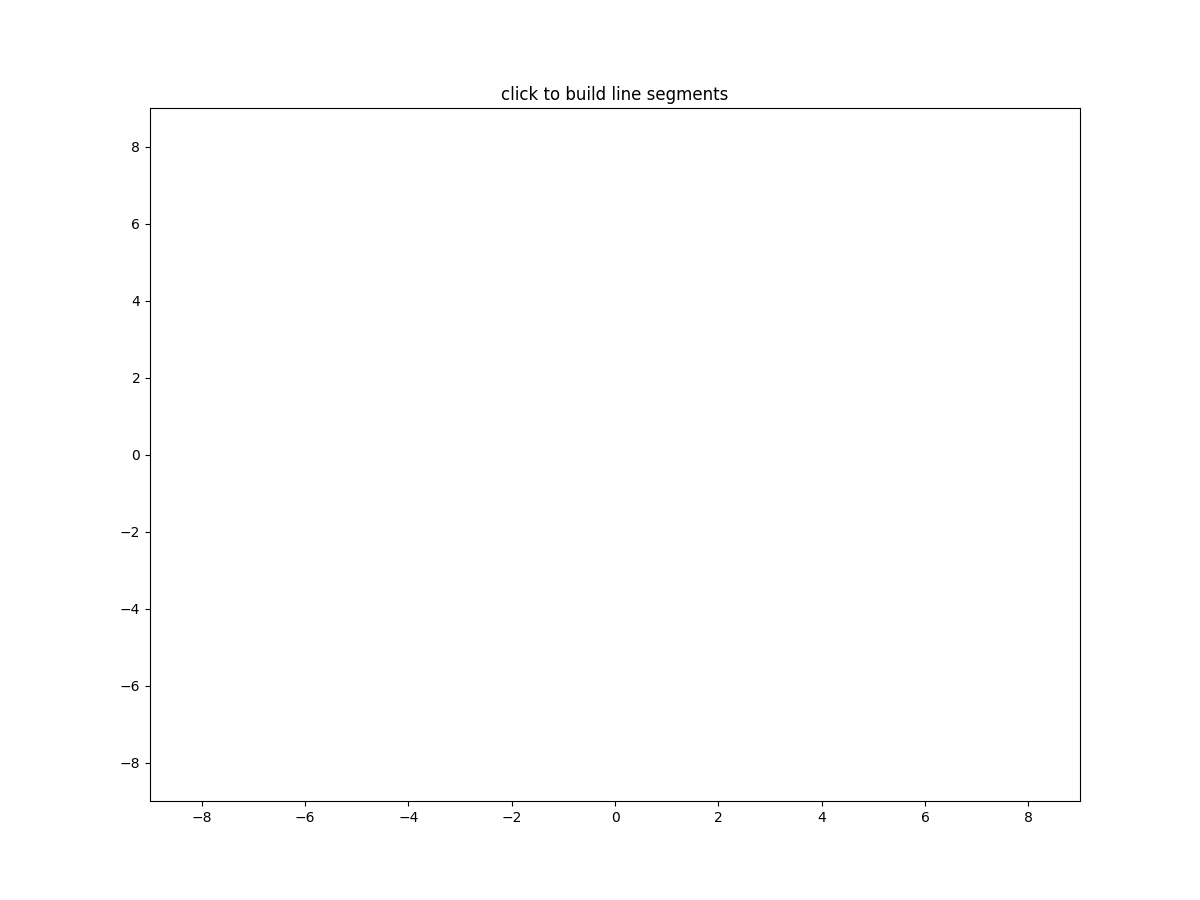

In [2]:
       

fig, ax = plt.subplots(figsize=(12,9))
ax.set_title('click to build line segments')
line, = ax.plot([], [])  # empty line
lineextender = Line2DExtender(line)
ax.set_xlim(-9, 9)
ax.set_ylim(-9, 9)

plt.show()

In [4]:
from sympy import Function, Symbol, symbols, lambdify
from sympy import sin, pi

from pyna.map import Map2D

rho, theta = symbols("r, \\theta", real=True)
epsilon = symbols("\\epsilon", real=True)
standard_map = Map2D(
    [rho, theta],
    [rho + epsilon*sin(theta), 
     theta + rho + epsilon*sin(theta)]
    )

fixed_points_rho = np.asarray([2*np.pi, 2*np.pi])
fixed_points_theta = np.asarray([0, np.pi])
fixed_points_x = fixed_points_rho * np.cos(fixed_points_theta)
fixed_points_y = fixed_points_rho * np.sin(fixed_points_theta)
fixed_points_scat = ax.scatter(fixed_points_x, fixed_points_y)


init_scat_x, init_scat_y = uniformly_scattered_points_in_polygon(lineextender)
init_scat_x, init_scat_y = np.asarray(init_scat_x), np.asarray(init_scat_y)
init_scat_rho = np.sqrt( init_scat_x ** 2 + init_scat_y ** 2 )
init_scat_theta = np.arctan2( init_scat_y, init_scat_x )
# scat = ax.scatter(init_scat_x, init_scat_y)

standard_map.param_dict = {epsilon: 0.3}


In [5]:
# mapped_scat_rho = lamb_rho_ip1(init_scat_rho, init_scat_theta)
# mapped_scat_theta = lamb_theta_ip1(init_scat_rho, init_scat_theta)
# mapped_scat_x = mapped_scat_rho * np.cos(mapped_scat_theta)
# mapped_scat_y = mapped_scat_rho * np.sin(mapped_scat_theta)
# scat.remove()
# scat = ax.scatter(mapped_scat_x, mapped_scat_y)
# init_scat_rho = mapped_scat_rho
# init_scat_theta = mapped_scat_theta

In [6]:
niter = 80
mapped_scat_rho = np.empty((len(init_scat_rho), niter))
mapped_scat_theta = np.empty((len(init_scat_rho), niter))
mapped_scat_x = np.empty((len(init_scat_rho), niter))
mapped_scat_y = np.empty((len(init_scat_rho), niter))
mapped_scat_rho[:,0] = init_scat_rho
mapped_scat_theta[:,0] = init_scat_theta
mapped_scat_x[:,0] = init_scat_x
mapped_scat_y[:,0] = init_scat_y

for i in range(niter-1):
    mapped_scat_rho[:,i+1], mapped_scat_theta[:,i+1] = standard_map([mapped_scat_rho[:,i], mapped_scat_theta[:,i]])
    mapped_scat_x[:,i+1] = mapped_scat_rho[:,i] * np.cos(mapped_scat_theta[:,i])
    mapped_scat_y[:,i+1] = mapped_scat_rho[:,i] * np.sin(mapped_scat_theta[:,i])
scat_list = []
for i in range(len(init_scat_rho)):
    scat_list.append( ax.scatter(mapped_scat_x[i,:], mapped_scat_y[i,:], s=0.02) )
    

In [7]:
twice_map = standard_map | standard_map
twice_map.next_xi_funcs

[\epsilon*sin(\theta) + \epsilon*sin(2*\epsilon*sin(\theta) + \theta + r) + r,
 3*\epsilon*sin(\theta) + \epsilon*sin(2*\epsilon*sin(\theta) + \theta + r) + \theta + 2*r]

In [ ]:
"""
Illustrate the figure and axes enter and leave events by changing the
frame colors on enter and leave
"""
import matplotlib.pyplot as plt

def enter_axes(event):
    print('enter_axes', event.inaxes)
    event.inaxes.patch.set_facecolor('yellow')
    event.canvas.draw()

def leave_axes(event):
    print('leave_axes', event.inaxes)
    event.inaxes.patch.set_facecolor('white')
    event.canvas.draw()

def enter_figure(event):
    print('enter_figure', event.canvas.figure)
    event.canvas.figure.patch.set_facecolor('red')
    event.canvas.draw()

def leave_figure(event):
    print('leave_figure', event.canvas.figure)
    event.canvas.figure.patch.set_facecolor('grey')
    event.canvas.draw()

fig1, axs = plt.subplots(2)
fig1.suptitle('mouse hover over figure or axes to trigger events')

fig1.canvas.mpl_connect('figure_enter_event', enter_figure)
fig1.canvas.mpl_connect('figure_leave_event', leave_figure)
fig1.canvas.mpl_connect('axes_enter_event', enter_axes)
fig1.canvas.mpl_connect('axes_leave_event', leave_axes)

fig2, axs = plt.subplots(2)
fig2.suptitle('mouse hover over figure or axes to trigger events')

fig2.canvas.mpl_connect('figure_enter_event', enter_figure)
fig2.canvas.mpl_connect('figure_leave_event', leave_figure)
fig2.canvas.mpl_connect('axes_enter_event', enter_axes)
fig2.canvas.mpl_connect('axes_leave_event', leave_axes)

plt.show()